In [ ]:
from google.colab import files

# Upload BOTH CSV files (repeat upload for each dataset)
uploaded = files.upload()


Saving historical_data.csv to historical_data.csv
Saving fear_greed_index (1).csv to fear_greed_index (1) (1).csv


In [ ]:
# See what files are uploaded
print(list(uploaded.keys()))


['historical_data.csv', 'fear_greed_index (1) (1).csv']


In [ ]:
import pandas as pd

# Replace these with the exact filenames from your upload step
trader_file = 'historical_data.csv'
sentiment_file = 'fear_greed_index (1) (1).csv'

# Load CSVs
trader_df = pd.read_csv(trader_file)
sentiment_df = pd.read_csv(sentiment_file)

# Preview top rows
print("Trader Data:")
display(trader_df.head())
print("\nSentiment Data:")
display(sentiment_df.head())


Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# Check data types & null values
print("\nTrader Data Info:")
print(trader_df.info())
print("\nMissing Values in Trader Data:")
print(trader_df.isnull().sum())

print("\nSentiment Data Info:")
print(sentiment_df.info())
print("\nMissing Values in Sentiment Data:")
print(sentiment_df.isnull().sum())



Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes

In [ ]:
# Convert trader timestamp to datetime (using Timestamp IST)
trader_df['date_only'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce').dt.date

# Convert sentiment 'date' column to datetime
sentiment_df['date_only'] = pd.to_datetime(sentiment_df['date'], errors='coerce').dt.date


In [ ]:
# Merge to add the 'classification' to each trader row
merged_df = pd.merge(
    trader_df,
    sentiment_df[['date_only', 'classification']],
    on='date_only',
    how='inner'  # keep only matching dates
)

print(f"Merged dataset shape: {merged_df.shape}")
display(merged_df.head())


Merged dataset shape: (35864, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [ ]:
import os
os.makedirs('csv_files', exist_ok=True)

merged_df.to_csv('csv_files/merged_data.csv', index=False)
print("Merged dataset saved at csv_files/merged_data.csv")


Merged dataset saved at csv_files/merged_data.csv


In [ ]:
# Average Closed PnL per sentiment type
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
print(avg_pnl)

# Total volume (Size USD) per sentiment type
total_volume = merged_df.groupby('classification')['Size USD'].sum()
print(total_volume)


classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: Closed PnL, dtype: float64
classification
Extreme Fear      9580240.04
Extreme Greed    18223760.27
Fear             79674391.06
Greed            57045815.74
Neutral          11939551.21
Name: Size USD, dtype: float64


In [ ]:
avg_leverage = merged_df.groupby('classification')['Start Position'].mean()
print(avg_leverage)


classification
Extreme Fear     21902.797505
Extreme Greed    24593.241160
Fear              8146.358518
Greed            37276.787811
Neutral          89199.587406
Name: Start Position, dtype: float64


In [ ]:
win_rate = merged_df.groupby('classification').apply(lambda x: (x['Closed PnL'] > 0).mean()*100)
print(win_rate)


classification
Extreme Fear     29.277730
Extreme Greed    55.328233
Fear             38.178672
Greed            43.570670
Neutral          49.492017
dtype: float64


/tmp/ipython-input-2140747619.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rate = merged_df.groupby('classification').apply(lambda x: (x['Closed PnL'] > 0).mean()*100)


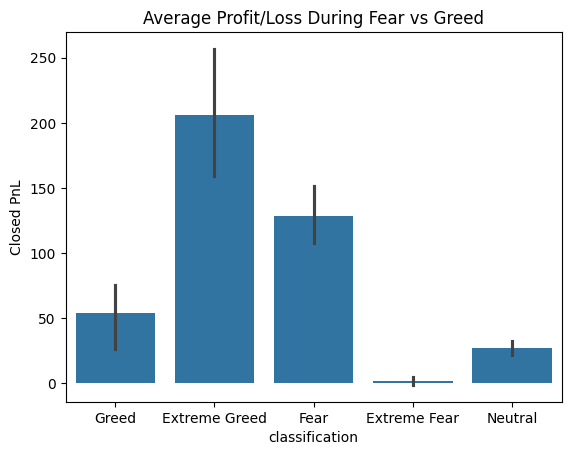

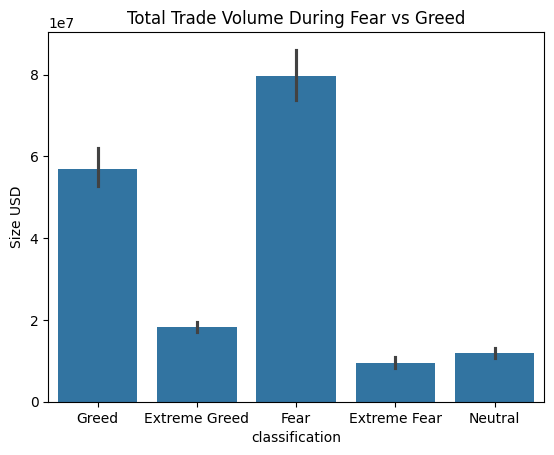

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot - Average PnL during Fear vs Greed
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator='mean')
plt.title('Average Profit/Loss During Fear vs Greed')
plt.show()

# Bar plot - Average USD trade volume
sns.barplot(data=merged_df, x='classification', y='Size USD', estimator='sum')
plt.title('Total Trade Volume During Fear vs Greed')
plt.show()
